In [1]:
ciaover -v

# packages in environment at /soft/miniconda/envs/ciao:
#
# Name                    Version                   Build  Channel
ciao                      4.13.0           py38h5ec60c1_0    https://cxc.cfa.harvard.edu/conda/ciao
ciao-contrib              4.13.0                     py_4    https://cxc.cfa.harvard.edu/conda/ciao
ds9                       8.2                           2    https://cxc.cfa.harvard.edu/conda/ciao
sherpa                    4.13.0           py38h5ec60c1_0    https://cxc.cfa.harvard.edu/conda/ciao
zciao                     4.13.3                        0    https://hea-www.harvard.edu/~kjg/ciao

System information:
Linux kjg-XPS-8940 5.8.0-41-generic #46~20.04.1-Ubuntu SMP Mon Jan 18 17:52:23 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
cd 13510

In [3]:
/bin/rm -rf dmradar
mkdir dmradar

In [4]:
punlearn dmradar
plist dmradar


Parameters for /home/kjg/cxcds_param4/dmradar.par

        infile =                  Input image
       outfile =                  Output file name
           snr = 0                SNR limit
       xcenter = 0                X coordinate of center of grid (physical pixels)
       ycenter = 0                Y coordinate of center of grid (physical pixels)
       (method = 4)               Number of subimages required to be above SNR threshold
        (shape = pie)             Shape of region to use
       (rinner = 5)               Minimum inner radius (physical pixels)
       (router = 1000)            Outer radius range, (physical pixels)
       (astart = 0)               Starting angle, degrees CCW +X axis
       (arange = 360)             Range of angles, degrees CCW from astart
  (ellipticity = 1)               Ellipticity of shape (1=circle,0=line)
       (rotang = 0)               Rotation angle of shape
    (minradius = 0.5)             Minimum allowed radius (phys pixels)
   

In [5]:
#ds9 img.fits

In [6]:
xcenter=4030.5
ycenter=4223.0
inner_radius=25


In [7]:
punlearn dmradar
time dmradar \
  infile=img.fits \
  outfile=dmradar/pie4.abin \
  snr=10 \
  xcen=$xcenter ycen=$ycenter\
  method=4 \
  shape=pie \
  rinner=$inner_radius router=1025 \
  outmask=dmradar/pie4.map \
  mode=h clob+


real	0m2.904s
user	0m2.178s
sys	0m0.092s


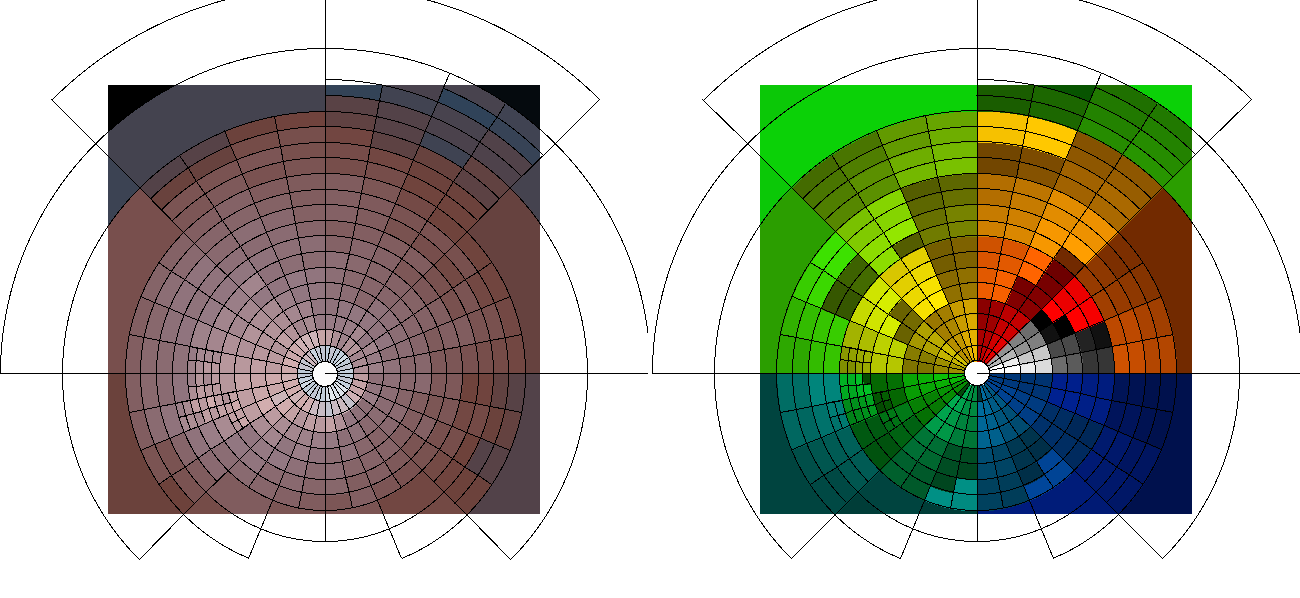

In [8]:
ds9 -geometry 1300x700 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  dmradar/pie4.abin -scale log \
  -cmap load sunset-in-atlantis.sao \
  -region dmradar/pie4.map"[region]" \
  -region select all -region color black -region select none \
  -block to 2 \
  dmradar/pie4.map -scale linear \
  -region select all -region color black -region select none \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png dmradar/pie4.abin.png -quit

display < dmradar/pie4.abin.png

In [9]:
pget dmradar shape.p_min

pie|epanda|bpanda|box


### `epanda`

In [10]:
shape=epanda
time dmradar \
  infile=img.fits \
  outfile=dmradar/${shape}4.abin \
  snr=10 \
  xcen=$xcenter ycen=$ycenter\
  method=4 \
  shape=${shape} \
  rinner=$inner_radius router=1020 rotang=30\
  outmask=dmradar/${shape}4.map \
  minrad=10 minangl=15 ell=0.7 \
  mode=h clob+


real	2m20.117s
user	2m20.011s
sys	0m0.100s


In [11]:
# ds9 does not render FITS `sector` region shapes so I'll make 
# a mask out of the map file and use that to show the boundaries.

dmimggrad dmradar/epanda4.map dmradar/epanda4.grad sobel mag clob+

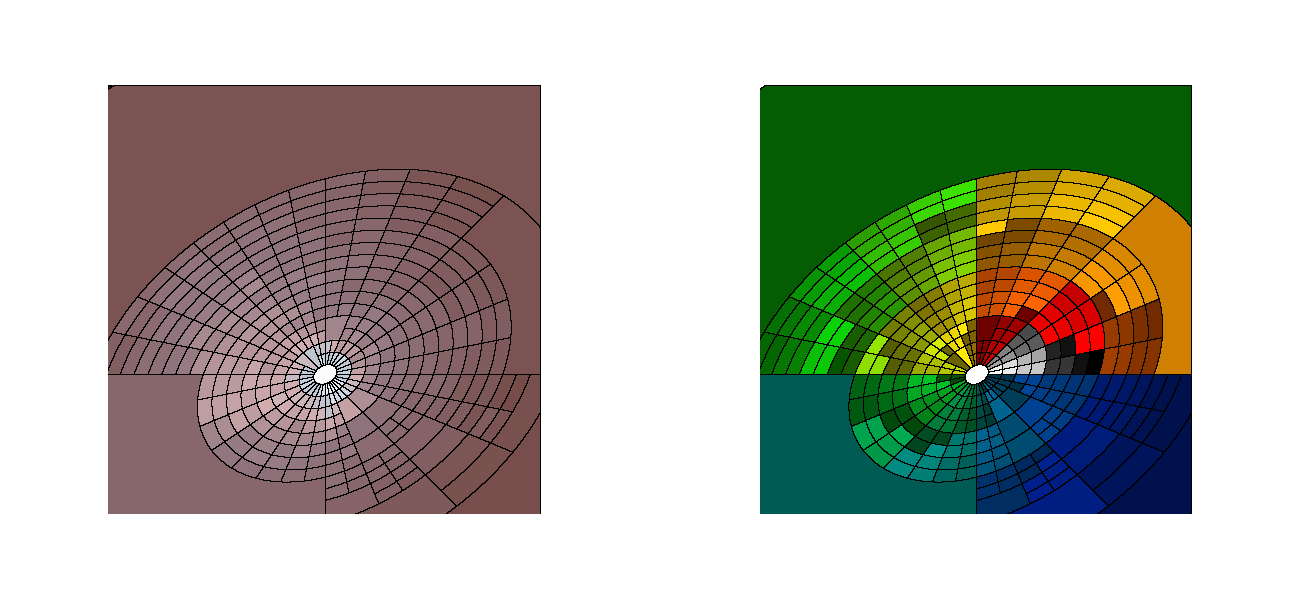

In [12]:
ds9 -geometry 1300x700 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  dmradar/epanda4.abin -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask dmradar/epanda4.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  dmradar/epanda4.map -scale linear \
  -region delete all \
  -mask color black -mask dmradar/epanda4.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png dmradar/epanda4.abin.png -quit

display < dmradar/epanda4.abin.png

### `bpanda`

In [13]:
shape=bpanda
time dmradar \
  infile=img.fits \
  outfile=dmradar/${shape}4.abin \
  snr=10 \
  xcen=$xcenter ycen=$ycenter\
  method=4 \
  shape=${shape} \
  rinner=$inner_radius router=1020 \
  outmask=dmradar/${shape}4.map \
  minrad=10 minangl=15 ell=0.7 rotang=10 \
  mode=h clob+


real	2m29.545s
user	2m29.417s
sys	0m0.116s


In [14]:
dmimggrad dmradar/bpanda4.map dmradar/bpanda4.grad sobel mag clob+

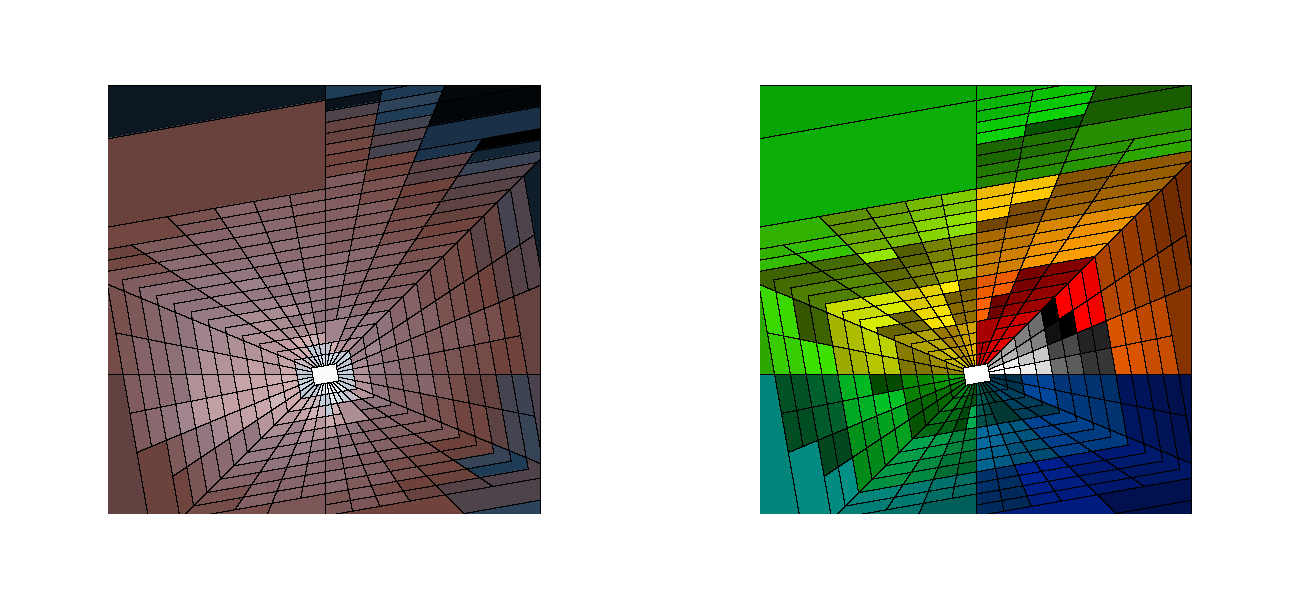

In [15]:
ds9 -geometry 1300x700 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  dmradar/bpanda4.abin -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask dmradar/bpanda4.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  dmradar/bpanda4.map -scale linear \
  -region delete all \
  -mask color black -mask dmradar/bpanda4.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png dmradar/bpanda4.abin.png -quit

display < dmradar/bpanda4.abin.png

### `box` 

akin to `dmnautilus`

In [16]:
shape=box
time dmradar \
  infile=img.fits \
  outfile=dmradar/${shape}4.abin \
  snr=10 \
  xcen=$xcenter ycen=$ycenter\
  method=4 \
  shape=${shape} \
  rinner=$inner_radius router=600 \
  outmask=dmradar/${shape}4.map \
  rotang=10 \
  mode=h clob+


real	0m1.182s
user	0m1.082s
sys	0m0.100s


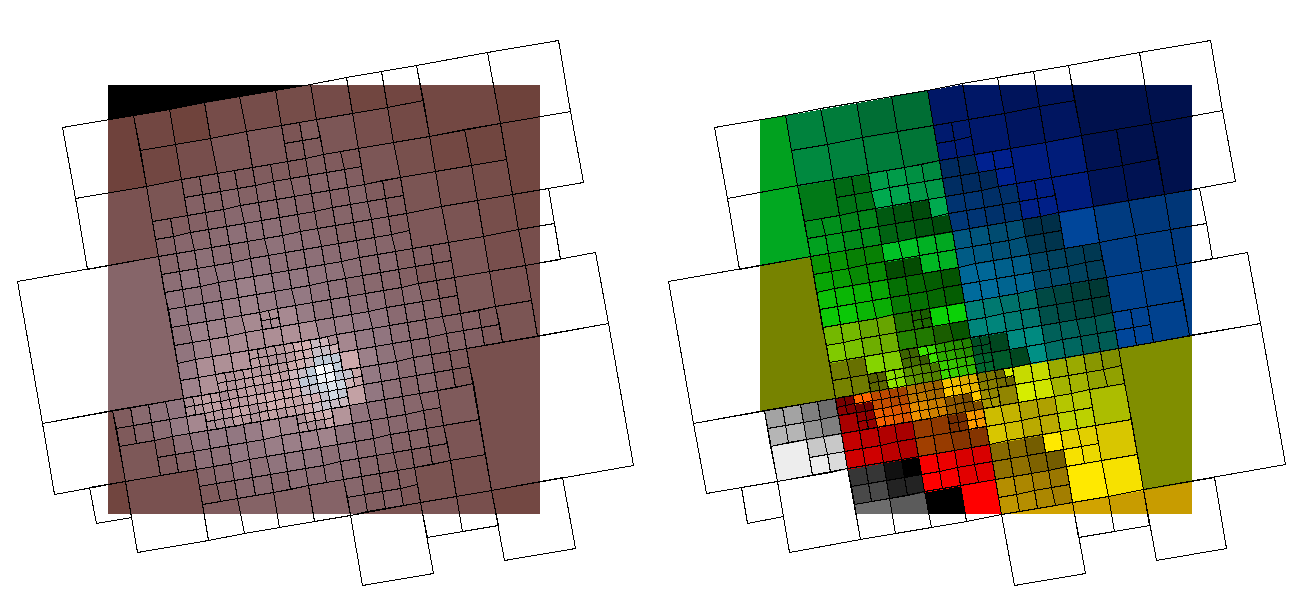

In [17]:
ds9 -geometry 1300x700 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  dmradar/box4.abin -scale log \
  -cmap load sunset-in-atlantis.sao \
  -region dmradar/box4.map"[region]" \
  -region select all -region color black -region select none \
  -block to 2 \
  dmradar/box4.map -scale linear \
  -region select all -region color black -region select none \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png dmradar/box4.abin.png -quit

display < dmradar/box4.abin.png